In [1]:
import numpy as np
from matplotlib import pyplot as plt

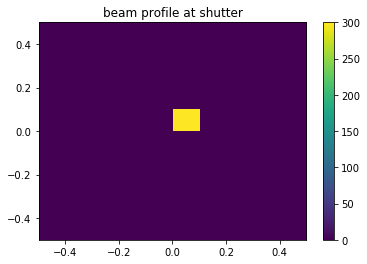

In [2]:
beam_profile_shutter = np.loadtxt('beam_profile_at_main_shutter_exit.dat')
plt.figure()
plt.title('beam profile at shutter')
plt.hist2d(beam_profile_shutter[:,0], beam_profile_shutter[:,1])
plt.colorbar()
plt.show()

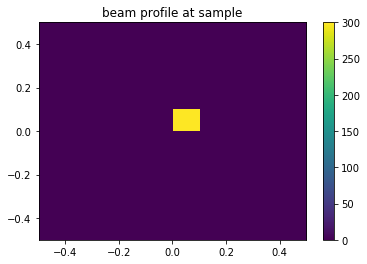

In [3]:
beam_profile_sample = np.loadtxt('beam_profile_at_sample.dat')
plt.figure()
plt.title('beam profile at sample')
plt.hist2d(beam_profile_sample[:,0], beam_profile_sample[:,1])
plt.colorbar()
plt.show()

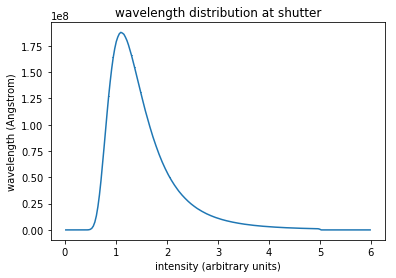

In [4]:
wavelength_distribution_shutter = np.loadtxt('wavelength_at_main_shutter_exit.dat')
plt.figure()
plt.title('wavelength distribution at shutter')
plt.errorbar(wavelength_distribution_shutter[:,0], wavelength_distribution_shutter[:,1], 
             wavelength_distribution_shutter[:,2])
plt.xlabel('intensity (arbitrary units)')
plt.ylabel('wavelength (Angstrom)')
plt.show()

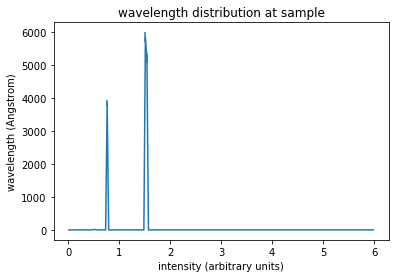

In [5]:
wavelength_distribution_sample = np.loadtxt('wavelength_at_sample.dat')
plt.figure()
plt.title('wavelength distribution at sample')
plt.errorbar(wavelength_distribution_sample[:,0], wavelength_distribution_sample[:,1], 
             wavelength_distribution_sample[:,2])
plt.xlabel('intensity (arbitrary units)')
plt.ylabel('wavelength (Angstrom)')
plt.show()

In [6]:
import os, sys
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'source_code')
if not libpath in sys.path:
    sys.path.insert(0, libpath)
    
COLLIMATOR_GEOMETRY_FILE_NAME = 'coll_geometry'
from create_collimator_geometry_HB3A import create as create_collimator
create_collimator(coll_front_end_from_center=500, max_coll_len=298, detector_width= 126. , 
                  detector_height = 340.,
                  min_channel_wall_thickness=2.0, min_channel_size=3.,
                  detector_angles=[-45,-135],multiple_collimator=False, 
                  horizontal_number_channels=15,
                  vertical_number_channels=3,
                  collimator_Nosupport=True, scad_flag=True,
                  outputfile=COLLIMATOR_GEOMETRY_FILE_NAME)

('vertical number of channels: ', 3.0)
('horizontal number of channels: ', 15)


In [9]:
import cad as cad
cad.xmlToOpenScad(filename=COLLIMATOR_GEOMETRY_FILE_NAME+'.xml')
!vglrun openscad {COLLIMATOR_GEOMETRY_FILE_NAME+'.scad'}
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/Fahima-Islam/HB3A_simulation/master/results/HB3A_collimator.png")